In [46]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df = pd.read_csv("business_sales_data.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Advertising Budget (USD)     5000 non-null   float64
 1   Store Size (sq. ft.)         5000 non-null   float64
 2   Customer Reviews (out of 5)  5000 non-null   float64
 3   Seasonality (0=Off, 1=Peak)  5000 non-null   int64  
 4   Sales (USD)                  5000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 195.4 KB
None


,Advertising Budget (USD),Store Size (sq. ft.),Customer Reviews (out of 5),"Seasonality (0=Off, 1=Peak)",Sales (USD)
0,7803.532318,2271.359841,2.494563,1,6323.997925
1,19038.928975,2630.460467,2.331648,1,6492.097949
2,14773.881865,4345.463269,1.704616,0,5701.577355
3,12173.840442,2030.019737,3.429067,1,10990.235218
4,3542.363489,4413.423582,2.906497,0,7059.051463
...,...,...,...,...,...
4995,17999.247707,4359.451947,3.603534,0,7173.346823
4996,2827.929721,4538.789758,1.711193,0,-519.633519
4997,6892.935339,4760.185618,1.204958,0,3810.058486
4998,16407.034922,2288.695966,3.731846,1,8608.210723


In [34]:
X = df[["Advertising Budget (USD)", "Store Size (sq. ft.)", 
          "Customer Reviews (out of 5)", "Seasonality (0=Off, 1=Peak)"]]
y = df["Sales (USD)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_train

,Advertising Budget (USD),Store Size (sq. ft.),Customer Reviews (out of 5),"Seasonality (0=Off, 1=Peak)"
4227,12998.827798,4506.361507,1.035099,0
4676,1420.335683,4766.239768,1.742298,1
800,14291.153369,1847.404062,2.404868,0
3671,1467.480280,1111.697363,1.103844,0
4193,14739.859196,4144.048379,4.253373,0
...,...,...,...,...
4426,5120.017881,1784.323806,3.827644,0
466,6071.385682,3999.775595,2.695825,0
3092,8281.188694,3136.383727,1.679358,0
3772,7207.174888,3003.063773,4.072991,1


In [36]:
X_test

,Advertising Budget (USD),Store Size (sq. ft.),Customer Reviews (out of 5),"Seasonality (0=Off, 1=Peak)"
1501,9844.046614,860.285311,4.537986,1
2586,1899.628221,2378.517278,1.834110,1
2653,1520.922894,4155.427997,2.820207,0
1055,7338.880401,2718.422197,2.385454,0
705,19804.224532,1695.585042,3.356847,1
...,...,...,...,...
4711,9431.558023,4368.494964,1.210366,1
2313,14194.045938,2131.624457,2.255517,0
3214,4977.164135,2207.576213,1.128861,0
2732,1627.966764,503.552800,3.513982,0


In [37]:
y_train

4227   -1032.229129
4676    6711.749362
800     2005.393402
3671     797.236444
4193    7136.079056
           ...     
4426    1796.842526
466      313.353896
3092    2991.495044
3772    7365.319276
860     5831.746332
Name: Sales (USD), Length: 4000, dtype: float64

In [38]:
y_test

1501    11636.942253
2586    10014.701063
2653     6198.444838
1055     2062.253436
705      8816.345737
            ...     
4711     6914.692611
2313     1383.089571
3214     3165.560313
2732     -874.132146
1926     7911.858342
Name: Sales (USD), Length: 1000, dtype: float64

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3872976.057789388
R-squared: 0.6855621660059186


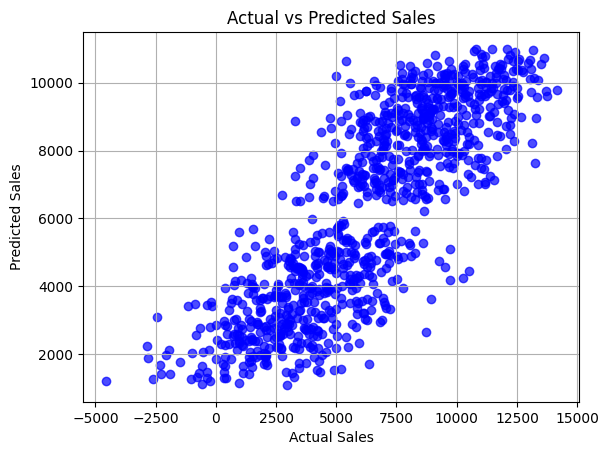

In [43]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()

In [ ]:
#Not good Resuls with Linear Regression

In [49]:
#With Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R-squared:", r2_lasso)

Lasso Regression - Mean Squared Error: 3873284.737341939
Lasso Regression - R-squared: 0.6855371050376982


In [48]:
#Still Same

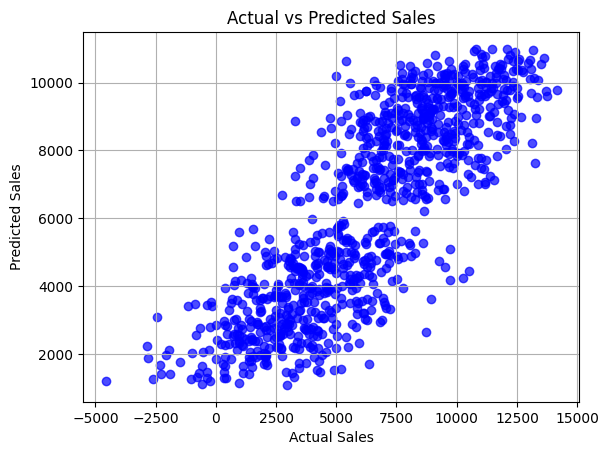

In [50]:
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()